# Example to use the library 📚
The theory is taken from:
The example from:

## Downloading the lib 🔽

In [ ]:
!wget https://raw.githubusercontent.com/datSeal09/ACCPS/main/dist/libaccps-1.0.0.tar.gz -O libaccps-1.0.0.tar.gz
!pip install libaccps-1.0.0.tar.gz
!rm libaccps-1.0.0.tar.gz

Processing ./libaccps-1.0.0.tar.gz
  Preparing metadata (setup.py) ... done
  Created wheel for LibACCPS: filename=LibACCPS-1.0.0-py3-none-any.whl size=8406 sha256=8e74ed3a89194cc55aacdb1ffd60158c6ace851cda5e94879119cb6250b4ad65
  Stored in directory: /root/.cache/pip/wheels/c2/5c/0e/31b144a813641a6754324113f33b2dd24beca6cc699df38b29
Successfully built LibACCPS


## 0: Importing the library 📖

In [15]:
# the lib
import LibACCPS as lib
# to display
from IPython.display import display

## 1: Defining the data 💾

----- STATES -----
  CFG_TX, IDLE, PREP_H, PREP_L, TX_H, TX_L
---- ALPHABET ----
  cfg, ok, rst, sH, sL, sw, sw2
--- INIT STATE ---
  IDLE
----- DELTA ------
  CFG_TX --(sH)--> PREP_H
  CFG_TX --(sL)--> PREP_L
  IDLE --(cfg)--> CFG_TX
  PREP_H --(ok)--> TX_H
  PREP_H --(sw)--> PREP_L
  PREP_L --(ok)--> TX_L
  PREP_L --(sw2)--> PREP_H
  TX_H --(rst)--> IDLE
  TX_L --(rst)--> IDLE
-- FINAL STATES --
  TX_H, TX_L


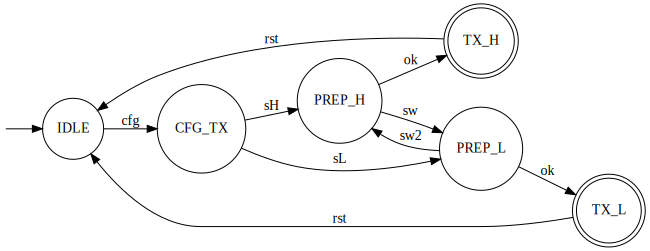

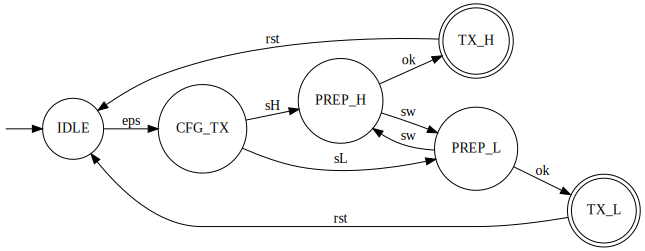

In [19]:
fz=frozenset

e_obs = fz(["sH", "sL", "sw", "ok", "rst"])
e_unobs = fz(["cfg"])
e_ins = fz({"sH", "sL"})
e_era = fz({"sH", "sL"})

rel={
    "sw2":"sw"
}
g = lib.DFA(
    states=fz([
        "IDLE",       # Inattivo
        "CFG_TX",     # Ricezione configurazione (payload valido)
        "PREP_H",     # Preparazione TX su banda alta
        "PREP_L",     # Preparazione TX su banda bassa
        "TX_H",       # Trasmissione su H confermata
        "TX_L"        # Trasmissione su L confermata
    ]),
    alphabet=fz([
        "sH", "sL", "sw2",
        "sw", "ok", "rst", "cfg"  # cfg_ok sarà trattato come Euo
    ]),
    initial="IDLE",
    finals=fz(["TX_H", "TX_L"]),
    delta={
        ("IDLE",     "cfg") : "CFG_TX",     # evento interno (unobs)

        ("CFG_TX",   "sH")  : "PREP_H",
        ("CFG_TX",   "sL")  : "PREP_L",

        ("PREP_H",   "sw") : "PREP_L",
        ("PREP_L",   "sw2") : "PREP_H",

        ("PREP_H",   "ok"): "TX_H",
        ("PREP_L",   "ok"): "TX_L",

        ("TX_H","rst")  : "IDLE",
        ("TX_L","rst")  : "IDLE"
    }
)
eq_nfa = lib.mask(g, e_obs, e_unobs, rel)
eq_nfa.print_data
g.print_data()

# display
display(lib.draw_dfa_graphviz(g, filename="DFA", inline = True))
display(lib.draw_nfa_graphviz(eq_nfa, filename="DFA_masked", inline = True))

# pdf
lib.draw_dfa_graphviz(g, filename="DFA", inline = False)
lib.draw_nfa_graphviz(eq_nfa, filename="DFA_masked", inline = False)


## 2: Computing the observer 👁️

----- STATES -----
  {CFG_TX, IDLE}, {PREP_H}, {PREP_L}, {TX_H}, {TX_L}
---- ALPHABET ----
  ok, rst, sH, sL, sw
--- INIT STATE ---
  {CFG_TX, IDLE}
----- DELTA ------
  {CFG_TX, IDLE} --(sH)--> {PREP_H}
  {CFG_TX, IDLE} --(sL)--> {PREP_L}
  {PREP_H} --(ok)--> {TX_H}
  {PREP_H} --(sw)--> {PREP_L}
  {PREP_L} --(ok)--> {TX_L}
  {PREP_L} --(sw)--> {PREP_H}
  {TX_H} --(rst)--> {CFG_TX, IDLE}
  {TX_L} --(rst)--> {CFG_TX, IDLE}
-- FINAL STATES --
  {TX_H}, {TX_L}


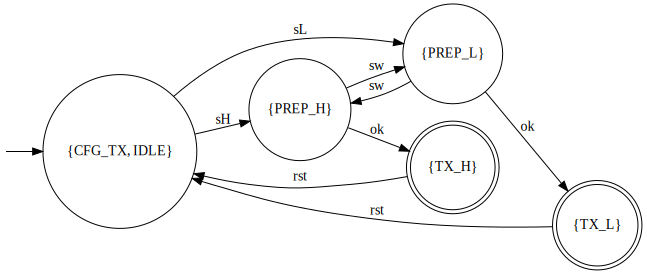

In [ ]:
obs=lib.compute_observer(eq_nfa)
obs.print_data()


display(lib.draw_dfa_graphviz(obs, filename="obs_graph", inline = True))

## 3: Computing the attack observer 🏹

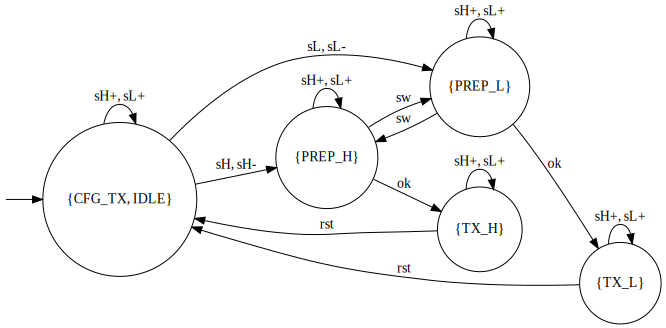

Attack Observer
----- STATES -----
  {CFG_TX, IDLE}, {PREP_H}, {PREP_L}, {TX_H}, {TX_L}
---- ALPHABET ----
  ok, rst, sH, sH+, sH-, sL, sL+, sL-, sw
--- INIT STATE ---
  {CFG_TX, IDLE}
----- DELTA ------
  {CFG_TX, IDLE} --(sH)--> {PREP_H}
  {CFG_TX, IDLE} --(sH+)--> {CFG_TX, IDLE}
  {CFG_TX, IDLE} --(sH-)--> {PREP_H}
  {CFG_TX, IDLE} --(sL)--> {PREP_L}
  {CFG_TX, IDLE} --(sL+)--> {CFG_TX, IDLE}
  {CFG_TX, IDLE} --(sL-)--> {PREP_L}
  {PREP_H} --(ok)--> {TX_H}
  {PREP_H} --(sH+)--> {PREP_H}
  {PREP_H} --(sL+)--> {PREP_H}
  {PREP_H} --(sw)--> {PREP_L}
  {PREP_L} --(ok)--> {TX_L}
  {PREP_L} --(sH+)--> {PREP_L}
  {PREP_L} --(sL+)--> {PREP_L}
  {PREP_L} --(sw)--> {PREP_H}
  {TX_H} --(rst)--> {CFG_TX, IDLE}
  {TX_H} --(sH+)--> {TX_H}
  {TX_H} --(sL+)--> {TX_H}
  {TX_L} --(rst)--> {CFG_TX, IDLE}
  {TX_L} --(sH+)--> {TX_L}
  {TX_L} --(sL+)--> {TX_L}
-- FINAL STATES --
  (none)


In [ ]:
att_obs, e_plus, e_minus=lib.create_attack_observer(obs, e_ins, e_era)

display(lib.draw_dfa_graphviz(att_obs, filename="att_obs_graph", inline=True))
print("Attack Observer")
att_obs.print_data()

## 4: Creating the operator observer 🛡️

Op Observer
----- STATES -----
  {CFG_TX, IDLE}, {PREP_H}, {PREP_L}, {TX_H}, {TX_L}, {empty}
---- ALPHABET ----
  ok, rst, sH, sH+, sH-, sL, sL+, sL-, sw
--- INIT STATE ---
  {CFG_TX, IDLE}
----- DELTA ------
  {CFG_TX, IDLE} --(ok)--> {empty}
  {CFG_TX, IDLE} --(rst)--> {empty}
  {CFG_TX, IDLE} --(sH)--> {PREP_H}
  {CFG_TX, IDLE} --(sH+)--> {PREP_H}
  {CFG_TX, IDLE} --(sH-)--> {CFG_TX, IDLE}
  {CFG_TX, IDLE} --(sL)--> {PREP_L}
  {CFG_TX, IDLE} --(sL+)--> {PREP_L}
  {CFG_TX, IDLE} --(sL-)--> {CFG_TX, IDLE}
  {CFG_TX, IDLE} --(sw)--> {empty}
  {PREP_H} --(ok)--> {TX_H}
  {PREP_H} --(rst)--> {empty}
  {PREP_H} --(sH)--> {empty}
  {PREP_H} --(sH+)--> {empty}
  {PREP_H} --(sH-)--> {PREP_H}
  {PREP_H} --(sL)--> {empty}
  {PREP_H} --(sL+)--> {empty}
  {PREP_H} --(sL-)--> {PREP_H}
  {PREP_H} --(sw)--> {PREP_L}
  {PREP_L} --(ok)--> {TX_L}
  {PREP_L} --(rst)--> {empty}
  {PREP_L} --(sH)--> {empty}
  {PREP_L} --(sH+)--> {empty}
  {PREP_L} --(sH-)--> {PREP_L}
  {PREP_L} --(sL)--> {empty}
  {PREP_

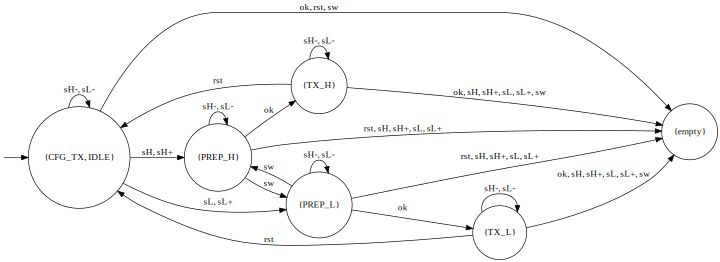

In [ ]:
op_obs=lib.create_operator_observer(obs, e_ins, e_era)

print("Op Observer")
op_obs.print_data()
display(lib.draw_dfa_graphviz(op_obs, filename="op_obs_graph", inline=True))

## 5: Computing the joint observer graph 👁️‍🗨️

----- STATES -----
  ({CFG_TX, IDLE}, {CFG_TX, IDLE}), ({CFG_TX, IDLE}, {PREP_H}), ({CFG_TX, IDLE}, {PREP_L})
  ({CFG_TX, IDLE}, {empty}), ({PREP_H}, {CFG_TX, IDLE}), ({PREP_H}, {PREP_H})
  ({PREP_H}, {PREP_L}), ({PREP_H}, {empty}), ({PREP_L}, {CFG_TX, IDLE}), ({PREP_L}, {PREP_H})
  ({PREP_L}, {PREP_L}), ({PREP_L}, {empty}), ({TX_H}, {TX_H}), ({TX_H}, {TX_L}), ({TX_H}, {empty})
  ({TX_L}, {TX_H}), ({TX_L}, {TX_L}), ({TX_L}, {empty})
---- ALPHABET ----
  ok, rst, sH, sH+, sH-, sL, sL+, sL-, sw
--- INIT STATE ---
  ({CFG_TX, IDLE}, {CFG_TX, IDLE})
----- DELTA ------
  ({CFG_TX, IDLE}, {CFG_TX, IDLE}) --(sH)--> ({PREP_H}, {PREP_H})
  ({CFG_TX, IDLE}, {CFG_TX, IDLE}) --(sH+)--> ({CFG_TX, IDLE}, {PREP_H})
  ({CFG_TX, IDLE}, {CFG_TX, IDLE}) --(sH-)--> ({PREP_H}, {CFG_TX, IDLE})
  ({CFG_TX, IDLE}, {CFG_TX, IDLE}) --(sL)--> ({PREP_L}, {PREP_L})
  ({CFG_TX, IDLE}, {CFG_TX, IDLE}) --(sL+)--> ({CFG_TX, IDLE}, {PREP_L})
  ({CFG_TX, IDLE}, {CFG_TX, IDLE}) --(sL-)--> ({PREP_L}, {CFG_TX, IDLE})
  ({C

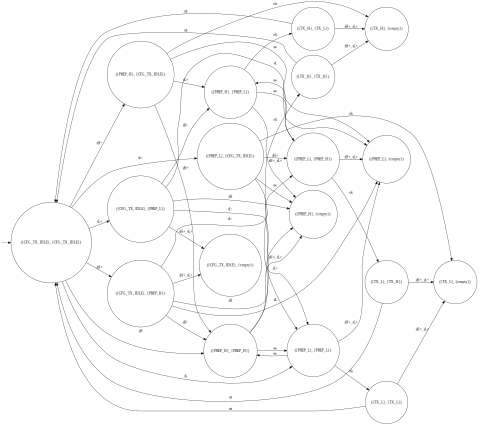

In [ ]:
mega_obs=lib.concurrent_composition(att_obs, op_obs)

mega_obs.print_data()

display(lib.draw_dfa_graphviz(mega_obs, filename="joint_observer_graph", inline=True))


## 6: Computing the n-bounded observer 🗞️

----- STATES -----
  0, 1
---- ALPHABET ----
  ok, rst, sH, sH+, sH-, sL, sL+, sL-, sw
--- INIT STATE ---
  0
----- DELTA ------
  0 --(ok)--> 0
  0 --(rst)--> 0
  0 --(sH)--> 0
  0 --(sH+)--> 1
  0 --(sH-)--> 0
  0 --(sL)--> 0
  0 --(sL+)--> 1
  0 --(sL-)--> 0
  0 --(sw)--> 0
  1 --(ok)--> 0
  1 --(rst)--> 0
  1 --(sH)--> 0
  1 --(sH-)--> 0
  1 --(sL)--> 0
  1 --(sL-)--> 0
  1 --(sw)--> 0
-- FINAL STATES --
  (none)


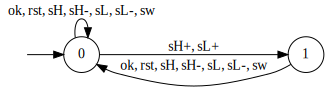

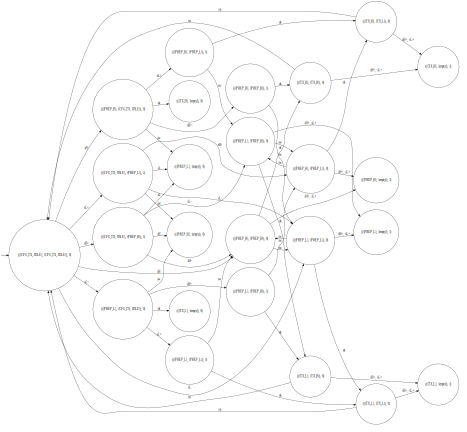

In [ ]:


g1 = lib.gn_creator(1, att_obs.alphabet, e_plus)
g1.print_data()
display(lib.draw_dfa_graphviz(g1, filename="bounder_1", inline=True))


bounded_1=lib.concurrent_composition(mega_obs, g1)
display(lib.draw_dfa_graphviz(bounded_1, filename="1_bounded_joint", inline=True))



## 7: Computing the supremal joint observer 🤴

Inserting (frozenset({'PREP_H'}), frozenset({'IDLE', 'CFG_TX'})) sL+ (frozenset({'PREP_H'}), frozenset({'PREP_L'}))
Inserting (frozenset({'PREP_H'}), frozenset({'IDLE', 'CFG_TX'})) sH+ (frozenset({'PREP_H'}), frozenset({'PREP_H'}))
Inserting (frozenset({'PREP_L'}), frozenset({'IDLE', 'CFG_TX'})) sL+ (frozenset({'PREP_L'}), frozenset({'PREP_L'}))
Inserting (frozenset({'PREP_L'}), frozenset({'IDLE', 'CFG_TX'})) sH+ (frozenset({'PREP_L'}), frozenset({'PREP_H'}))


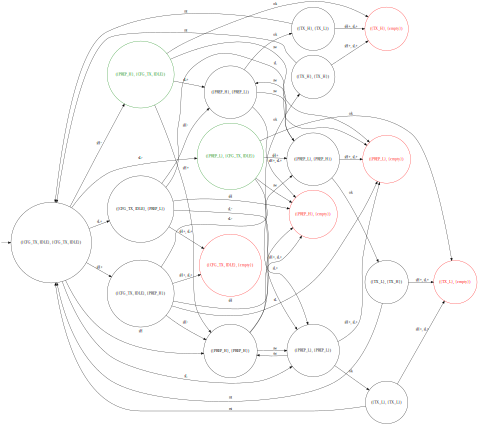

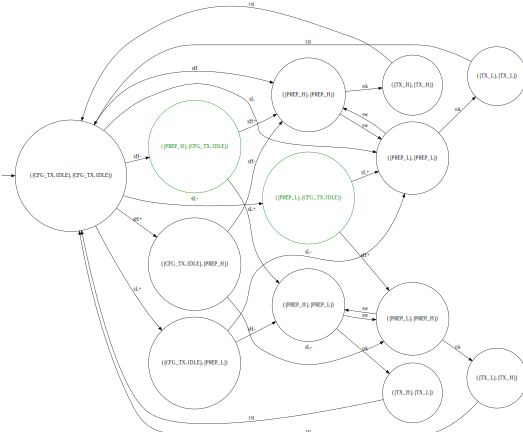

In [ ]:
forbidden_states=set(lib.compute_forbidden(mega_obs))
trim, R_preemp=lib.trim_joint_observer_v2(mega_obs, e_obs,e_era, e_ins)
weakly=mega_obs.states-trim.states-forbidden_states
colors={
    "red": forbidden_states,
    "orange": weakly,
    "green": R_preemp
}

display(lib.draw_dfa_graphviz(mega_obs, filename="Trim_Colored", state_colors=colors, inline=True))
display(lib.draw_dfa_graphviz(trim, filename="Trim", state_colors=colors, inline=True))
